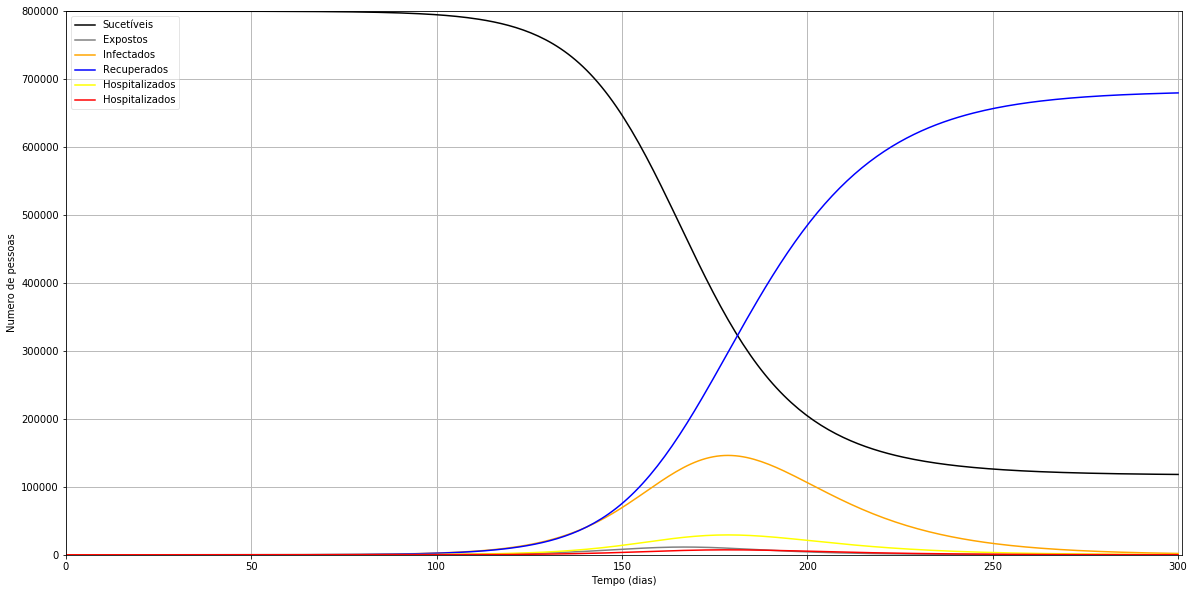

In [41]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# população brasil
N = 800000
#infectados iniciais
I0 = 1
#recuperados iniciais
R0 = 0
#sucetíveis iniciais
S0 = N
# expostos iniciais - não contagiosos ainda
E0 = 1
contatos_dia = 3
prob_contato = 0.05
#razão de contato
beta = contatos_dia * prob_contato
#razão de recuperação média
gamma = 1/15 # assumir recuperação em 15 dias

hospitalizados = 0
internados_uti = 0
# 200 evenly spaced values (representing days)
t = np.linspace(0, 300, 300)

sigma = 1

ySeir0 = S0, I0, R0, E0, hospitalizados, internados_uti
def func_seir_model(ySeir0, t, N):
    S, I, R, E, hospitalizados, internados_uti = ySeir0
    dSdt = -(beta * S * I / N) 
    dEdt = beta * S * I /N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I 
    hospitalizados = dIdt * 0.2 #
    internados_uti = dIdt * 0.05
    return dSdt, dIdt, dRdt, dEdt, hospitalizados, internados_uti
    

#for beta_val in beta_values:
# Integrate the diff eqs over the time array
values = odeint(func_seir_model, ySeir0, t, args=(N,))
# assign S, I, R values from values transpose
S, I, R, E, hospitalizados, internados_uti = values.T
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'black', lw=1.5, label='Sucetíveis')
ax.plot(t, E, 'gray', lw=1.5, label='Expostos')
ax.plot(t, I, 'orange', lw=1.5, label='Infectados')
ax.plot(t, R, 'blue', lw=1.5, label='Recuperados')
ax.plot(t, hospitalizados, 'yellow', lw=1.5, label='Hospitalizados')
ax.plot(t, internados_uti, 'red', lw=1.5, label='Hospitalizados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Numero de pessoas')
ax.set_ylim(0,800000)
ax.set_xlim(0,301)
ax.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')        
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()    